In [2]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
import seaborn as sns

In [4]:
trial_data = pd.read_csv('../data/Pilots/data_trials_10.csv')
movement_data = pd.read_csv('../data/Pilots/data_movements_10.csv')

In [6]:
#set trials to match for both data frames 
trial_data['trial'] = trial_data.trial - 1

df = movement_data[['x', 'y', 'time', 'trial', 'state']]

# Desired timestamp granularity
timestamp_granularity = 0.001

# Create an empty list to store interpolated dataframes
interpolated_dfs = []

# Iterate through the rows of the original DataFrame
for i in range(len(df) - 1):
    # Extract data from the current and next rows
    current_row = df.iloc[i]
    next_row = df.iloc[i + 1]

    # Calculate the time points for interpolation
    t1 = current_row["time"]
    t2 = next_row["time"]

    # Calculate the number of points to interpolate between t1 and t2
    num_points = int((t2 - t1) / timestamp_granularity)

    # Create an array of interpolated time points
    interpolated_times = np.linspace(t1, t2, num_points + 1)

    # Perform linear interpolation for 'x' and 'y' columns
    interpolated_x = np.interp(interpolated_times, [t1, t2], [current_row["x"], next_row["x"]])
    interpolated_y = np.interp(interpolated_times, [t1, t2], [current_row["y"], next_row["y"]])

    # Create a new DataFrame for this segment of interpolation
    interpolated_segment = pd.DataFrame({
        "x": interpolated_x,
        "y": interpolated_y,
        "time": interpolated_times,
        "trial": [current_row["trial"]] * (num_points + 1),  # Include trial number
        "state": [current_row["state"]] * (num_points + 1)  # Include state
    })

    # Append the interpolated segment to the list
    interpolated_dfs.append(interpolated_segment)

# Concatenate all interpolated segments into one DataFrame
interpolated_df = pd.concat(interpolated_dfs, ignore_index=True)

# Print the interpolated DataFrame
interpolated_df

,x,y,time,trial,state
0,1.160125,2.861691,0.008533,0,search_ring
1,1.160126,2.861694,0.009570,0,search_ring
2,1.160127,2.861698,0.010608,0,search_ring
3,1.160128,2.861702,0.011645,0,search_ring
4,1.160128,2.861705,0.012682,0,search_ring
...,...,...,...,...,...
1652709,1.785726,8.072734,1608.227906,299,iti
1652710,1.785879,8.047035,1608.228971,299,iti
1652711,1.786031,8.021336,1608.230037,299,iti
1652712,1.786184,7.995636,1608.231103,299,iti


<Axes: xlabel='x', ylabel='y'>

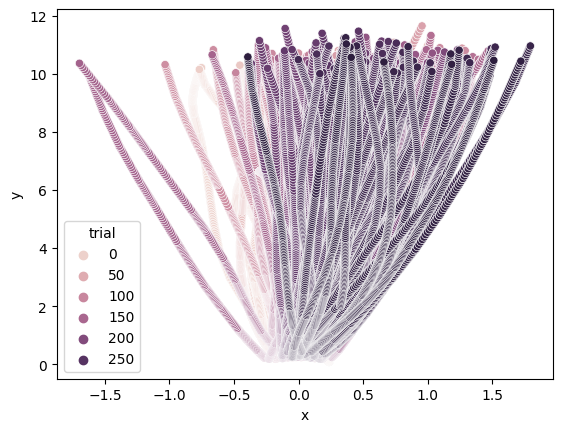

In [7]:
sns.scatterplot(data = interpolated_df.loc[interpolated_df.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [8]:
combined_data = pd.merge(trial_data, movement_data, on = 'trial', how = 'left')
combined_data

,Unnamed: 0_x,cursor_vis,midpoint_vis,endpoint_vis,cursor_sig,cursor_mp_sig,cursor_ep_sig,clamp,rot,trial,...,unlimited_uncertainty,endpoint_theta,movement_time,movement_initiation_time,Unnamed: 0_y,state,sample,time,x,y
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,90.969781,0.584947,0.517210,0,search_ring,0,0.008533,1.160125,2.861691
1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,90.969781,0.584947,0.517210,1,search_ring,1,0.016831,1.160131,2.861720
2,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,90.969781,0.584947,0.517210,2,search_ring,2,0.033971,1.160141,2.861809
3,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,90.969781,0.584947,0.517210,3,search_ring,3,0.050889,1.160126,2.861838
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,90.969781,0.584947,0.517210,4,search_ring,4,0.066786,1.160148,2.861844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90778,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.784043,0.231781,0.335186,253,iti,96487,1608.166202,1.783393,9.574320
90779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.784043,0.231781,0.335186,254,iti,96488,1608.183173,1.783843,9.165780
90780,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.784043,0.231781,0.335186,255,iti,96489,1608.201185,1.783437,8.758247
90781,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.784043,0.231781,0.335186,256,iti,96490,1608.216182,1.784046,8.355428


Temp comment: 
next convert co-ordinates into cartesian co-ordinates
append r and theta columns 
check for theta at r = 2.5 per trial, check if there is 1/trial or if there are multiple or none or mixed. 